In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs  = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\cluster_two_blobs.csv")
two_blobs_outliers  = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\cluster_two_blobs_outliers.csv")

In [17]:
two_blobs_outliers.shape

(1003, 2)

<Axes: xlabel='X1', ylabel='X2'>

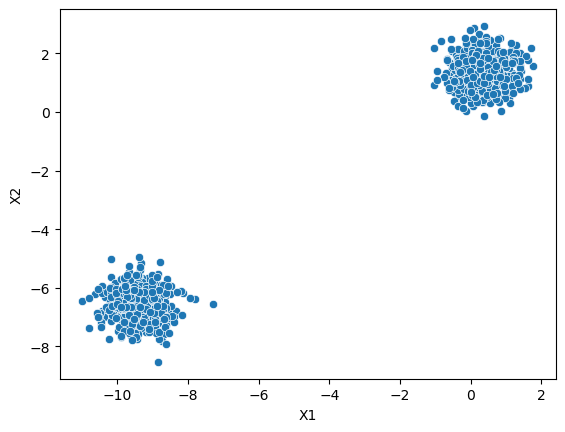

In [3]:
sns.scatterplot(data=two_blobs, x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

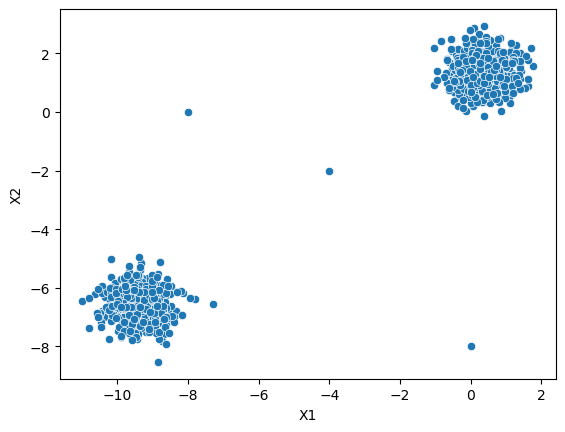

In [4]:
sns.scatterplot(data=two_blobs_outliers, x='X1',y='X2')

In [5]:
def disp_cat(model,ds):
    pred = model.fit_predict(ds)
    sns.scatterplot(data=ds, x = 'X1', y = 'X2', hue = pred, palette='Set1')

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN()

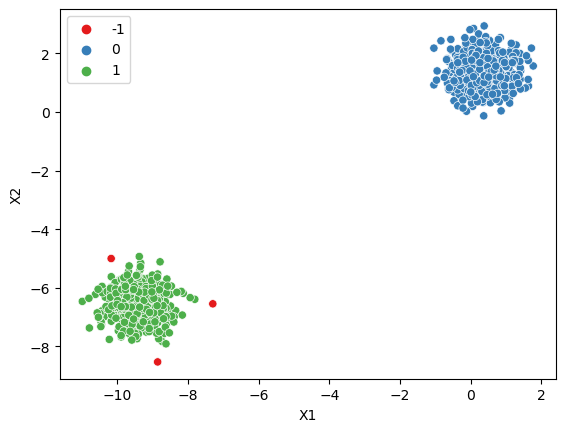

In [8]:
disp_cat(dbscan,two_blobs)

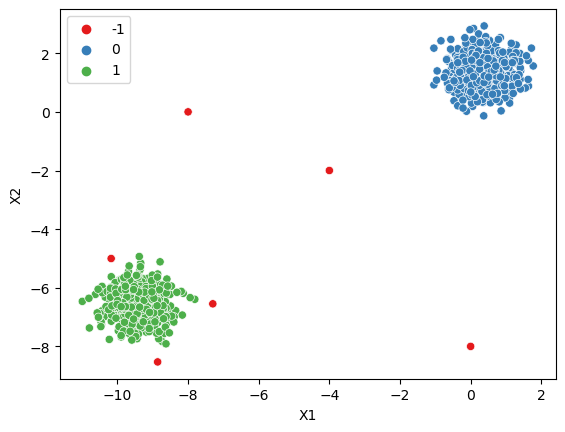

In [9]:
disp_cat(dbscan,two_blobs_outliers)

# Epsilon

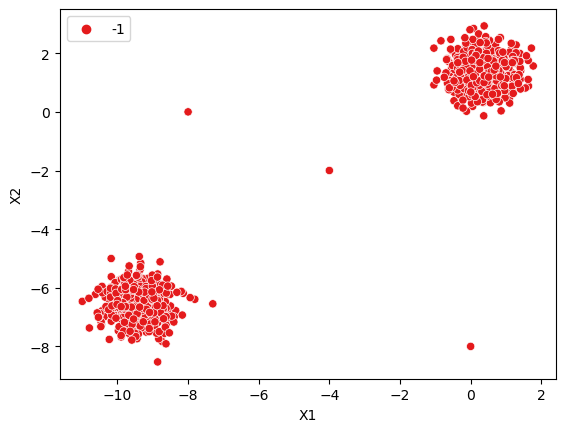

In [10]:
dbscan1 = DBSCAN(eps = 0.001)
disp_cat(dbscan1,two_blobs_outliers)

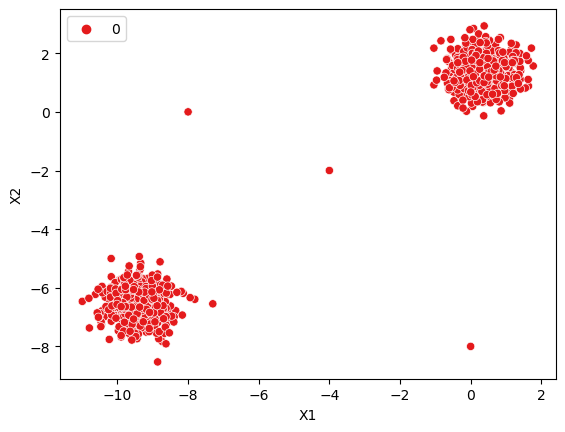

In [11]:
dbscan1 = DBSCAN(eps = 1000)
disp_cat(dbscan1,two_blobs_outliers)

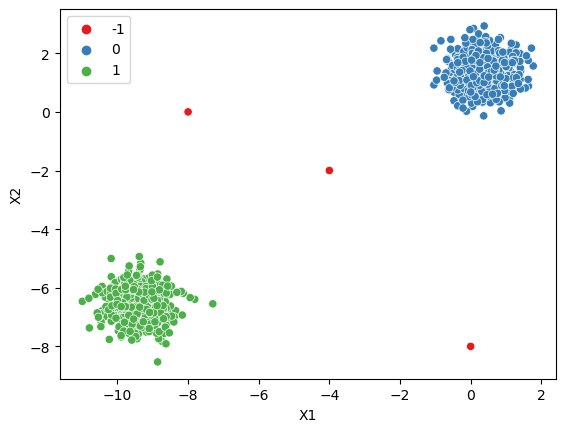

In [12]:
dbscan1 = DBSCAN(eps = 1)
disp_cat(dbscan1,two_blobs_outliers)

In [13]:
np.sum(dbscan1.labels_ == -1)

3

In [16]:
len(dbscan1.labels_)

1003

In [14]:
np.sum(dbscan1.labels_ == -1)*100/len(dbscan1.labels_)

0.29910269192422734

# Plotting Epsilon Values

In [18]:
outlier_pcent = []
no_of_outliers = []

for epsi in np.linspace(.001,10,100):
    
    dbscan2 = DBSCAN(eps=epsi)
    dbscan2.fit(two_blobs_outliers)
    
    no_of_outliers.append(np.sum(dbscan2.labels_ == -1))
    
    percent_o = 100*np.sum(dbscan2.labels_ == -1)/len(dbscan2.labels_)
    
    outlier_pcent.append(percent_o)

Text(0.5, 0, 'Epsilon Value')

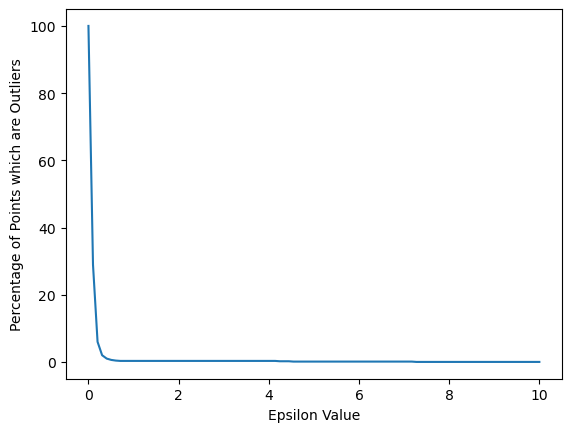

In [20]:
sns.lineplot(x=np.linspace(.001,10,100),y=outlier_pcent)
plt.ylabel('Percentage of Points which are Outliers')
plt.xlabel('Epsilon Value')

(0.0, 1.0)

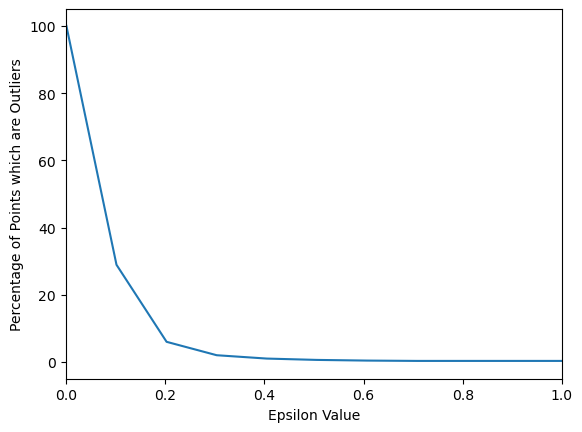

In [21]:
sns.lineplot(x=np.linspace(.001,10,100),y=outlier_pcent)
plt.ylabel('Percentage of Points which are Outliers')
plt.xlabel('Epsilon Value')
plt.xlim(0,1)

In [22]:
outlier_pcent = []
no_of_outliers = []

for epsi in np.linspace(.001,7,200):
    
    dbscan2 = DBSCAN(eps=epsi)
    dbscan2.fit(two_blobs_outliers)
    
    no_of_outliers.append(np.sum(dbscan2.labels_ == -1))
    
    percent_o = 100*np.sum(dbscan2.labels_ == -1)/len(dbscan2.labels_)
    
    outlier_pcent.append(percent_o)

(0.0, 1.0)

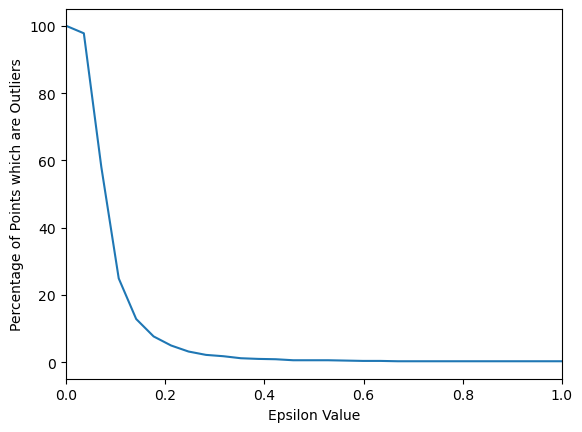

In [23]:
sns.lineplot(x=np.linspace(.001,7,200),y=outlier_pcent)
plt.ylabel('Percentage of Points which are Outliers')
plt.xlabel('Epsilon Value')
plt.xlim(0,1)

(0.0, 5.0)

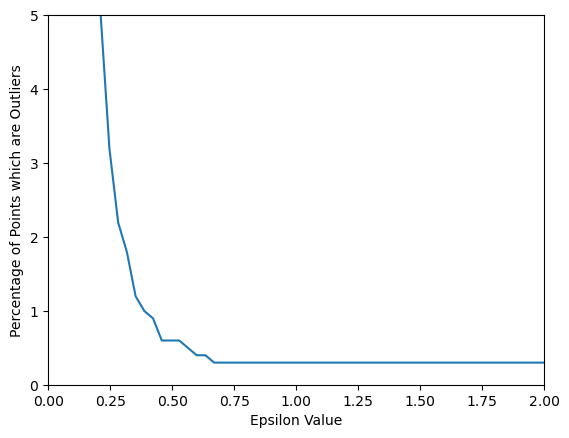

In [25]:
sns.lineplot(x=np.linspace(.001,7,200),y=outlier_pcent)
plt.ylabel('Percentage of Points which are Outliers')
plt.xlabel('Epsilon Value')
plt.xlim(0,2)
plt.ylim(0,5)

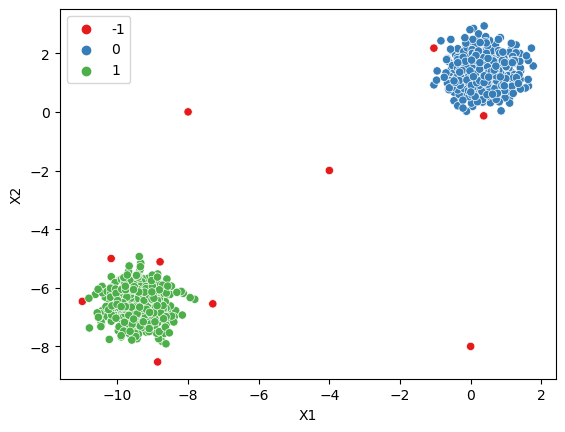

In [26]:
disp_cat(DBSCAN(eps = 0.4),two_blobs_outliers)

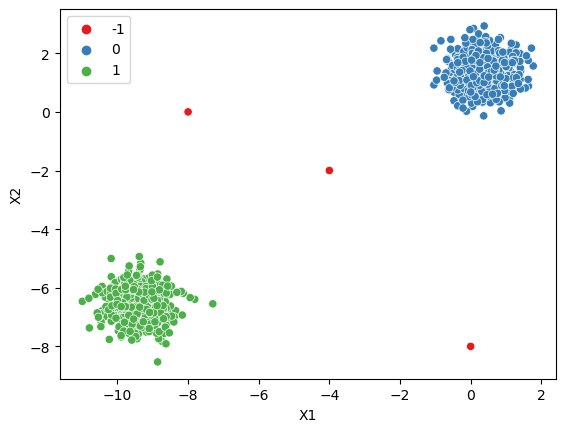

In [28]:
disp_cat(DBSCAN(eps = 0.7),two_blobs_outliers)

# Minimum Samples

In [29]:
np.arange(1,100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [32]:
outlier_pcent1 = []

for n in np.arange(1,100):
    dbscan_ms = DBSCAN(min_samples=n)
    dbscan_ms.fit(two_blobs_outliers)
    
    percent_o1 = 100*np.sum(dbscan_ms.labels_ == -1)/len(dbscan_ms.labels_)
    outlier_pcent1.append(percent_o1)

Text(0.5, 0, 'Min No of Samples')

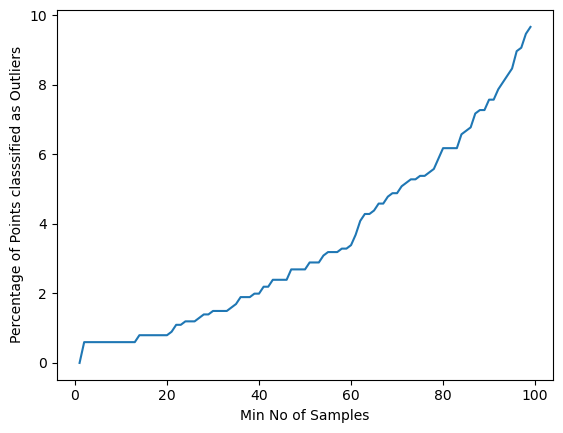

In [38]:
sns.lineplot(x=np.arange(1,100), y = outlier_pcent1)
plt.ylabel('Percentage of Points classsified as Outliers')
plt.xlabel('Min No of Samples')
#plt.xlim(0,5)
#plt.ylim(0,1.5)

In [39]:
dim = two_blobs_outliers.shape[1]

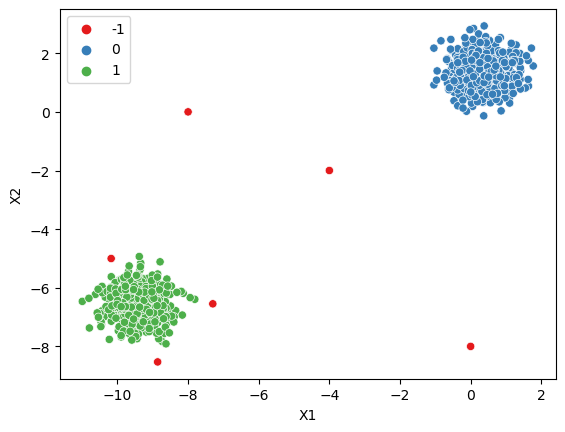

In [40]:
dbscan3 = DBSCAN(min_samples=2*dim)
disp_cat(dbscan3,two_blobs_outliers)

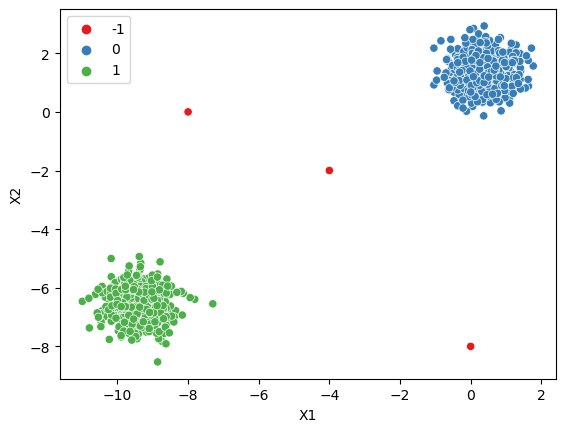

In [43]:
dbscan3 = DBSCAN(eps = 0.7,min_samples=2*dim)
disp_cat(dbscan3,two_blobs_outliers)